In [1]:
import numpy as np
import cv2
from colorthief import ColorThief
import io
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
test_images = ['/Users/Rabbit/Downloads/china_test.jpg', 
               '/Users/Rabbit/Downloads/vilnius_test.jpg', 
               '/Users/Rabbit/Downloads/spices_test.jpg']

In [3]:
loc_fashion_images = ['/Users/Rabbit/capstone/materials/scrape_fashion_2/2003.86.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/2006.44.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/2006.56.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/2006.56.2.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/2007.30.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/2008.4.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/2010.98.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/74.32.4.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/76.64.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/80.1.4.png']

In [4]:
# img_path = loc_fashion_images[1]

In [5]:
img_path = test_images[1]

In [162]:
class Palettization():
    """processes a single image path and returns image, centroids(dominant colors), palette"""
    
    def __init__(self, img_path):
        self.img_path = img_path
        self.img_palette = self.get_palette_()
        self.color_arr = self.get_color_array()
        self.centroid_lst = self.arrayify_centroids()
        self.counts = self.centroid_cos_similar()
        self.color_count = 7

    def get_palette_(self):
        """return image color palette"""
        colorthief = ColorThief(self.img_path)
        img_palette = colorthief.get_palette(color_count=color_count, quality=1)
        return img_palette


    def get_color_array(self):
        """return array of palette colors"""
        color_arr = []
        for color in self.img_palette:
            color_val = []
            for rgb_val in color:
                color_val.append(rgb_val/255)
            color_arr.append(tuple(color_val))
        return color_arr


    def arrayify_centroids(self):
        """return array of image palette (centroids)"""
        self.centroid_lst = np.array(self.img_palette)
        return self.centroid_lst
    
    def _centroid_cos_similar(self, pixels, centroid):
        numerator = (pixels * centroid).sum(axis=1)
        denominator = (np.linalg.norm(pixels, axis=1) * np.linalg.norm(centroid))
        return (numerator / denominator)  


    def centroid_cos_similar(self):
        """"""
        lst = []
        self.centroid_lst = self.img_palette
        img = cv2.imread(self.img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        for centroid in self.centroid_lst:
            lst.append(self._centroid_cos_similar(img.reshape(-1, 3), centroid))

        centroid_argmax = np.array(lst).argmax(axis=0)

        _, counts = np.unique(centroid_argmax, return_counts=True)
        return counts

    
    def zip_centroid_count(self):
        """"""
        return [{'rgb': rgb, 'count':count} for rgb, count in zip(self.img_palette, self.counts)]
    
    
    def display_palette(self):
        """"""
        self.get_color_array()
        return plt.imshow([(self.color_arr)])

    
    def display_img(self):
        """"""
        colorthief = ColorThief(self.img_path)
        img = colorthief.image
        return img

In [163]:
palette_me_now = Palettization(img_path)

NameError: name 'color_count' is not defined

In [8]:
palette_me_now.zip_centroid_count()

[{'count': 266171, 'rgb': (200, 161, 70)},
 {'count': 239798, 'rgb': (36, 46, 40)},
 {'count': 51464, 'rgb': (130, 146, 146)},
 {'count': 13455, 'rgb': (171, 176, 172)},
 {'count': 90169, 'rgb': (123, 145, 125)},
 {'count': 18908, 'rgb': (109, 112, 101)},
 {'count': 16698, 'rgb': (62, 85, 101)}]

In [9]:
try_me = [Palettization(link) for link in test_images]

/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


[{'count': 198445, 'rgb': (156, 14, 12)},
 {'count': 166125, 'rgb': (152, 173, 201)},
 {'count': 33936, 'rgb': (33, 13, 12)},
 {'count': 20761, 'rgb': (170, 83, 69)},
 {'count': 83184, 'rgb': (228, 228, 236)},
 {'count': 19475, 'rgb': (145, 130, 127)},
 {'count': 18074, 'rgb': (148, 98, 110)}]

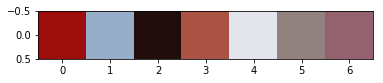

In [125]:
i = 0
try_me[i].display_palette()

try_me[i].zip_centroid_count()

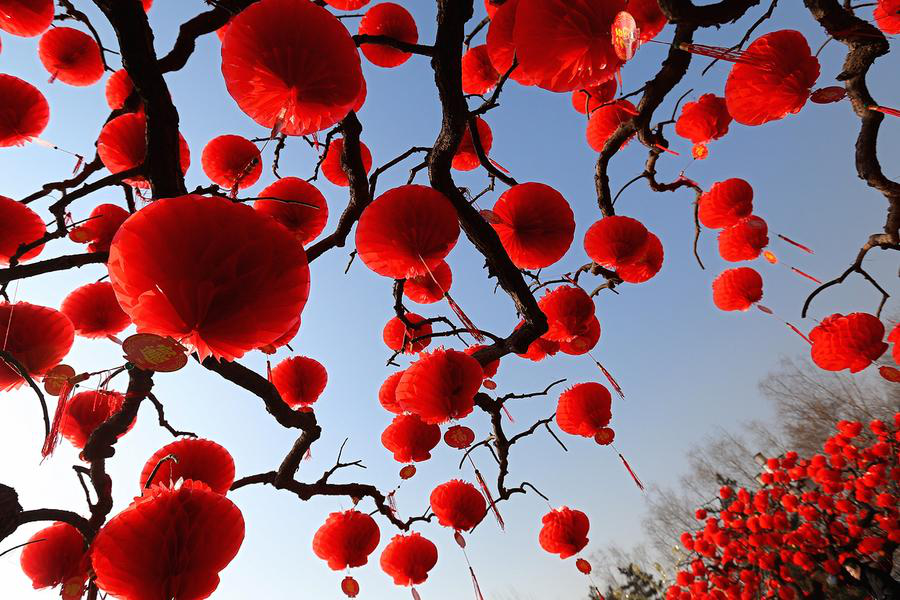

In [126]:
try_me[i].display_img()

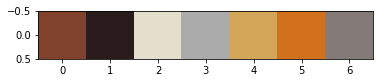

In [11]:
for item in try_me:
    item.display_palette()

In [114]:
palette_color_percent

{(33, 13, 12): 0.062844444444444439,
 (36, 46, 40): 0.44407037037037039,
 (42, 28, 29): 0.10488148148148148,
 (62, 85, 101): 0.030922222222222222,
 (109, 112, 101): 0.035014814814814818,
 (123, 145, 125): 0.16697962962962962,
 (128, 66, 44): 0.10690185185185185,
 (130, 146, 146): 0.09530370370370371,
 (132, 122, 120): 0.051511111111111112,
 (145, 130, 127): 0.036064814814814813,
 (148, 98, 110): 0.033470370370370373,
 (152, 173, 201): 0.30763888888888891,
 (156, 14, 12): 0.36749074074074073,
 (170, 83, 69): 0.038446296296296298,
 (171, 176, 172): 0.024916666666666667,
 (172, 171, 171): 0.22113703703703705,
 (200, 161, 70): 0.49290925925925927,
 (210, 113, 29): 0.23497037037037036,
 (210, 165, 89): 0.1290351851851852,
 (228, 223, 204): 0.15489629629629631,
 (228, 228, 236): 0.15404444444444446}

In [57]:
palette_color_percent = {}
# label_
img_pixel_sum = 0

for image in try_me:
    for i in image.zip_centroid_count():
        img_pixel_sum += i['count']
#     print(img_pixel_sum)
        palette_color_percent[i['rgb']] = i['count'] / 540000

sorted(palette_color_percent, key=lambda x: palette_color_percent[x], reverse=True)

[(200, 161, 70),
 (36, 46, 40),
 (156, 14, 12),
 (152, 173, 201),
 (210, 113, 29),
 (172, 171, 171),
 (123, 145, 125),
 (228, 223, 204),
 (228, 228, 236),
 (210, 165, 89),
 (128, 66, 44),
 (42, 28, 29),
 (130, 146, 146),
 (33, 13, 12),
 (132, 122, 120),
 (170, 83, 69),
 (145, 130, 127),
 (109, 112, 101),
 (148, 98, 110),
 (62, 85, 101),
 (171, 176, 172)]

In [85]:
p_c_list = list(palette_color_percent)

In [86]:
p_c_list[0][0]

156

In [91]:
palette_color_percent

{(33, 13, 12): 0.062844444444444439,
 (36, 46, 40): 0.44407037037037039,
 (42, 28, 29): 0.10488148148148148,
 (62, 85, 101): 0.030922222222222222,
 (109, 112, 101): 0.035014814814814818,
 (123, 145, 125): 0.16697962962962962,
 (128, 66, 44): 0.10690185185185185,
 (130, 146, 146): 0.09530370370370371,
 (132, 122, 120): 0.051511111111111112,
 (145, 130, 127): 0.036064814814814813,
 (148, 98, 110): 0.033470370370370373,
 (152, 173, 201): 0.30763888888888891,
 (156, 14, 12): 0.36749074074074073,
 (170, 83, 69): 0.038446296296296298,
 (171, 176, 172): 0.024916666666666667,
 (172, 171, 171): 0.22113703703703705,
 (200, 161, 70): 0.49290925925925927,
 (210, 113, 29): 0.23497037037037036,
 (210, 165, 89): 0.1290351851851852,
 (228, 223, 204): 0.15489629629629631,
 (228, 228, 236): 0.15404444444444446}

In [97]:
r_vals = []
b_vals = []
g_vals = []



for color in palette_color_percent:
    r_chan = color[0]
    b_chan = color[1]
    g_chan = color[2]
    r_vals.append(r_chan)
    b_vals.append(b_chan)
    g_vals.append(g_chan)

In [102]:
r_mean = np.mean(r_vals)
r_mean

142.14285714285714

In [113]:
r_stat = np.array(r_vals)
r_stat.min()
r_stat.max() 

228

In [103]:
b_mean = np.mean(b_vals)
b_mean

118.95238095238095

In [105]:
g_mean = np.mean(g_vals)
g_mean

105.14285714285714

In [ ]:
era_features = []
image_features = {}



In [130]:
from colour import Color

In [132]:
c = Color()

In [133]:
morning_pic = ['/Users/Rabbit/Desktop/Screen Shot 2017-10-25 at 07.56.08.png']

In [137]:
c_harmony = Palettization('/Users/Rabbit/Desktop/Screen Shot 2017-10-25 at 07.56.08.png')

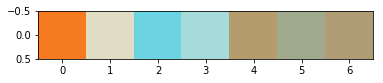

In [138]:
c_harmony.display_palette()

In [142]:
c_harmony.arrayify_centroids()

array([[245, 122,  32],
       [223, 221, 195],
       [108, 211, 227],
       [165, 219, 218],
       [180, 156, 108],
       [159, 170, 143],
       [176, 156, 117]])

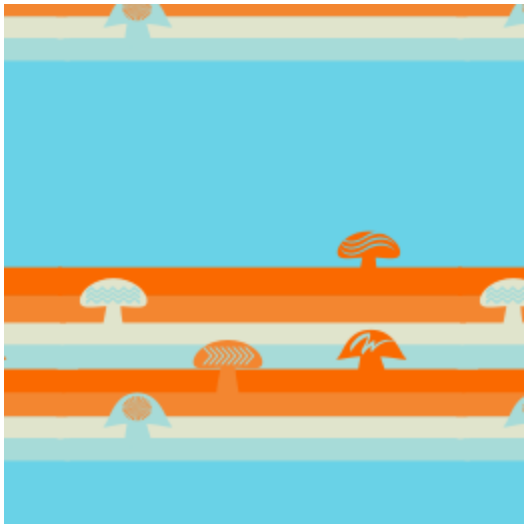

In [140]:
c_harmony.display_img()

In [ ]:
try_me[1].arrayify_centroids()

In [ ]:
get_palette(img_path)

In [ ]:
plt.imshow([(centroid_lst).astype('uint8')])

In [ ]:
# import colorgram

# img = ('/Users/Rabbit/capstone/materials/scrape_fashion_2/76.64.1.png')

In [ ]:
# colors = colorgram.extract(img, 6)

In [ ]:
# colors[0]